## Prima parte Data mining

In [102]:
import pandas as pd
import seaborn as sns
import scipy as sp
import math
import matplotlib.pyplot as plt
from plotly.offline import iplot
from scipy.spatial.distance import cosine
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
import math 
import numpy as np
#py.offline.init_notebook_mode(connected=True) 
#cf.go_offline() 

In [103]:
df=pd.read_csv('train.csv', skipinitialspace=True)

In [104]:
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [105]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature', 'n_beats',
       'n_bars', 'popularity_confidence', 'processing', 'genre'],
      dtype='object')

In [106]:
df['n_beats'].max()

7348.0

In [107]:
df['n_bars'].max()

2170.0

In [108]:
df.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000
mean,2.468075e+05,27.423667,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,2.467947e+05,3.876179,501.862333,128.39340,0.490479,2.199647
std,1.279941e+05,18.587534,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,1.279850e+05,0.566491,280.689804,75.11391,0.291330,1.212616
min,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,0.000000,0.00000,0.000000,0.748116
25%,1.800000e+05,14.000000,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,1.800000e+05,4.000000,327.000000,83.00000,0.230000,1.170953
50%,2.278260e+05,24.000000,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,2.278185e+05,4.000000,461.000000,117.00000,0.480000,1.738916
75%,2.889030e+05,42.000000,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,2.889030e+05,4.000000,625.000000,159.00000,0.739000,3.349057
max,4.120258e+06,94.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.939000,0.996000,1.000000,0.994000,0.995000,220.525000,4.120258e+06,5.000000,7348.000000,2170.00000,1.000000,4.067086


In [109]:
df.dtypes

name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

## Gestione dei valori nulli

In [110]:
df.isnull().sum()

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64

In [111]:
df['mode'].median()

1.0

In [112]:
df['mode']
df.isnull().sum()
for i in range(df["mode"].shape[0]):
    a=df["mode"][i]
    if math.isnan(a):
        #print(df["popularity_confidence"][i])
        df["mode"][i]=df['mode'].median()
df.head(100)

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.6900,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.0690,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.3630,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.5230,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.6430,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Confide,268378,False,34,Technimatic;A Little Sound,Confide,0.2850,0.867,10,-3.650,...,0.0887,0.0378,173.818,268378,4.0,752.0,189.0,NaN,0.757389,idm
96,Rockit,155653,False,23,Bad Boy Bill,The Album,0.8660,0.574,7,-7.836,...,0.0406,0.6020,127.951,155653,4.0,328.0,81.0,NaN,4.067086,chicago-house
97,My Promiscuous Daughter,196960,False,28,CKY,"Camp Kill Yourself, Vol.1",0.2630,0.767,7,-10.161,...,0.3560,0.3080,125.995,196960,4.0,410.0,103.0,NaN,4.067086,industrial
98,Are You Ready (ft. Capital J),171789,False,14,Bassnectar;Capital J,Cozza Frenzy,0.4710,0.731,1,-6.222,...,0.1950,0.6670,94.511,171789,4.0,256.0,63.0,NaN,2.367412,breakbeat


0.43824680973163016

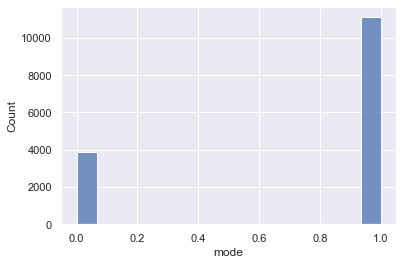

In [113]:
df[['mode']]


sns.histplot(df["mode"])

df["mode"].std()

In [114]:
df.isnull().sum()

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64

In [115]:
df['time_signature'].isnull().sum()

2062

In [116]:
df['time_signature'].shape[0]

15000

In [117]:
(2062/15000)*100

13.746666666666666

In [118]:
df['time_signature']
df.isnull().sum()
for i in range(df["time_signature"].shape[0]):
    a=df["time_signature"][i]
    if math.isnan(a):
        #print(df["popularity_confidence"][i])
        df["time_signature"][i]=df["time_signature"].median()
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


In [119]:
df.isnull().sum()

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature               0
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64

In [120]:
df=df.drop(['popularity', 'popularity_confidence'], axis=1)


In [121]:
print(1 - cosine(df["duration_ms"], df["features_duration_ms"])) ## contengono gli stessi dati

0.9999826934770785


In [122]:
df=df.drop(['features_duration_ms'], axis=1)
df

,name,duration_ms,explicit,artists,album_name,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,Long Road,241760,False,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,...,0.302000,0.536000,0.2810,0.6350,142.221,4.0,567.0,141.0,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,...,0.283000,0.934000,0.3600,0.0336,75.596,4.0,617.0,155.0,2.367412,iranian
2,Ondskapens Galakse,333506,False,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,1.0,...,0.000089,0.800000,0.2620,0.4890,116.628,4.0,652.0,162.0,3.700483,black-metal
3,Can't Look Away,269800,False,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,...,0.066400,0.001270,0.1170,0.3850,140.880,4.0,619.0,155.0,1.279305,bluegrass
4,Thunderground,307651,False,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,...,0.000576,0.096900,0.2990,0.6370,143.956,4.0,733.0,183.0,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,Autechre,EP7,0.554,0.657,1,-14.232,1.0,...,0.016000,0.615000,0.1320,0.0335,117.319,4.0,837.0,212.0,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,1.0,...,0.548000,0.940000,0.1230,0.0016,92.323,3.0,277.0,92.0,2.367412,sleep
14997,Psychological Attack,400091,False,Droplex,Psychological Attack,0.799,0.535,1,-9.103,1.0,...,0.001830,0.857000,0.0713,0.0708,126.000,4.0,837.0,209.0,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,1.0,...,0.000337,0.000014,0.4020,0.2700,160.044,4.0,513.0,130.0,1.279305,breakbeat


In [123]:
df.isnull().sum()

name                0
duration_ms         0
explicit            0
artists             0
album_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
n_beats             0
n_bars              0
processing          0
genre               0
dtype: int64

## Correlazioni

In [124]:
df.corr()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing
duration_ms,1.000000,-0.048723,-0.080932,0.102996,0.016712,0.039403,-0.017485,-0.074774,-0.184902,0.079685,-0.021184,-0.141938,0.048765,0.008208,0.839313,0.838041,-0.010400
explicit,-0.048723,1.000000,0.056992,0.124405,-0.000991,0.131777,-0.032567,0.294287,-0.113975,-0.125101,0.006995,0.008631,0.016972,0.047941,-0.039830,-0.039435,-0.005878
danceability,-0.080932,0.056992,1.000000,0.193940,0.035311,0.385244,-0.061064,0.111454,-0.199082,-0.202316,-0.174193,0.559578,0.092267,0.274946,-0.033604,-0.069332,-0.026273
energy,0.102996,0.124405,0.193940,1.000000,0.057815,0.720907,-0.060875,0.143454,-0.699454,-0.203111,0.191024,0.284069,0.331538,0.191553,0.243586,0.208615,-0.037847
key,0.016712,-0.000991,0.035311,0.057815,1.000000,0.047718,-0.130170,0.018157,-0.049867,-0.001532,-0.007420,0.028221,0.022414,0.026923,0.027133,0.022042,-0.490366
loudness,0.039403,0.131777,0.385244,0.720907,0.047718,1.000000,-0.027032,0.109793,-0.552519,-0.447106,0.047502,0.377743,0.308203,0.235546,0.165565,0.131064,-0.020563
mode,-0.017485,-0.032567,-0.061064,-0.060875,-0.130170,-0.027032,1.000000,-0.047440,0.066816,-0.061329,0.013532,-0.001951,-0.011408,-0.015951,-0.023168,-0.019885,0.206992
speechiness,-0.074774,0.294287,0.111454,0.143454,0.018157,0.109793,-0.047440,1.000000,-0.087997,-0.115803,0.050034,0.056068,0.062161,0.075101,-0.043217,-0.040820,-0.022909
acousticness,-0.184902,-0.113975,-0.199082,-0.699454,-0.049867,-0.552519,0.066816,-0.087997,1.000000,0.094256,-0.075924,-0.131961,-0.244244,-0.131329,-0.283324,-0.248164,0.022684
instrumentalness,0.079685,-0.125101,-0.202316,-0.203111,-0.001532,-0.447106,-0.061329,-0.115803,0.094256,1.000000,-0.088589,-0.348955,-0.117466,-0.115587,0.034830,0.044498,-0.012960


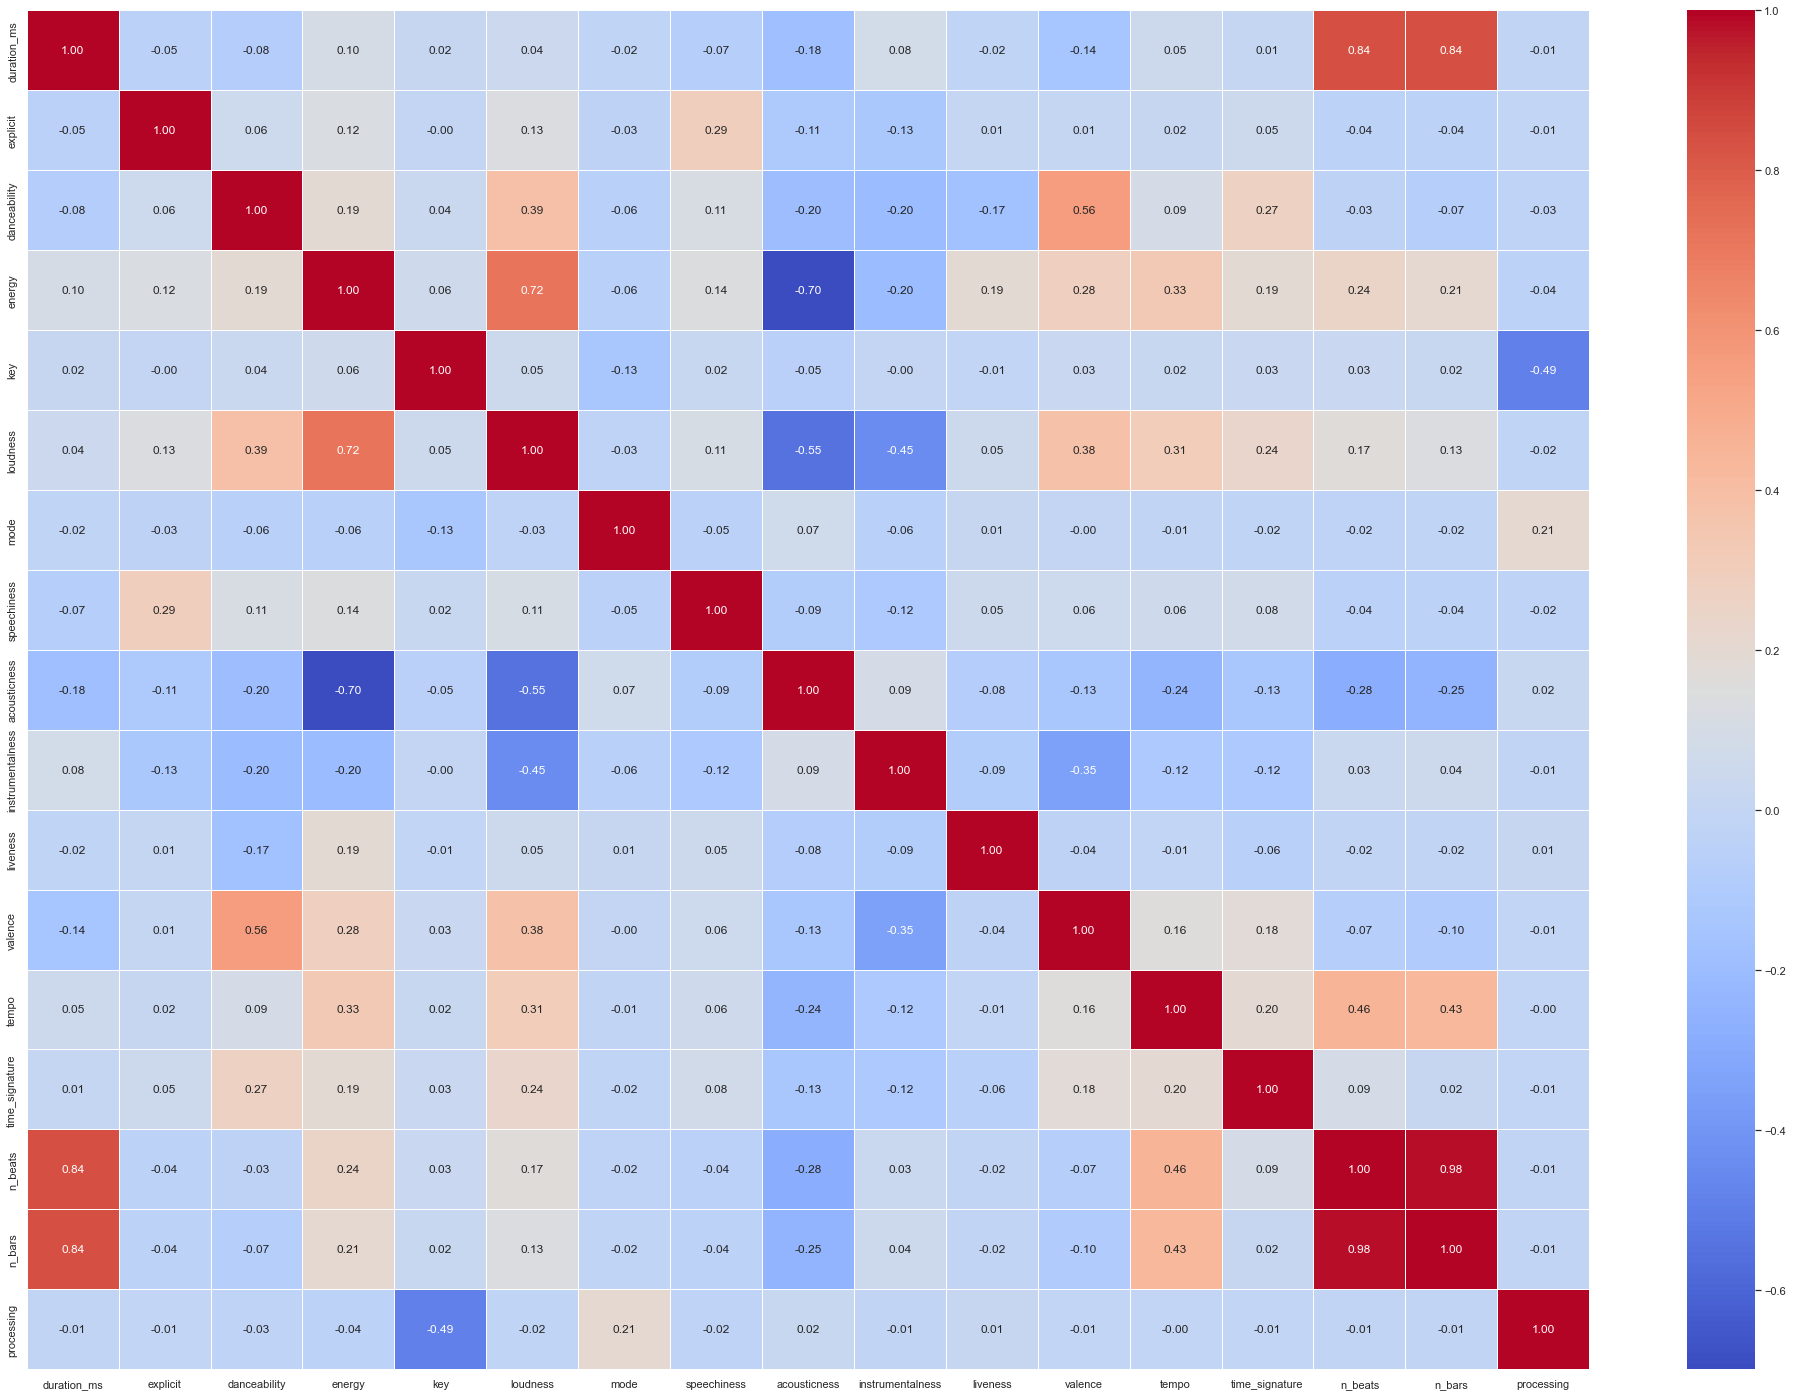

In [125]:
plt.figure(figsize = (35, 25))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True, fmt=".2f", linewidth='.8') 
sns.set(font_scale=1)
 

In [126]:
sns.set(font_scale=1)

## Correlazioni con Energia

In [127]:
x = df['loudness']
y = df['energy']


(corr_pearson, pvalue) =sp.stats.pearsonr(x, y)
print("Coefficiente di Pearson:", round(corr_pearson,2))
print("p-value:", pvalue)

Coefficiente di Pearson: 0.72
p-value: 0.0


<Axes: xlabel='loudness', ylabel='energy'>

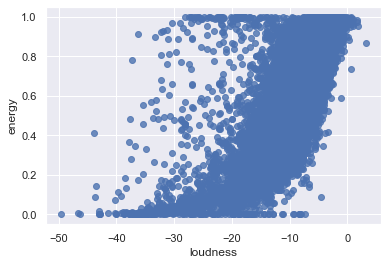

In [128]:
sns.regplot(x='loudness', y='energy', fit_reg=False, data=df)

<Axes: xlabel='tempo', ylabel='energy'>

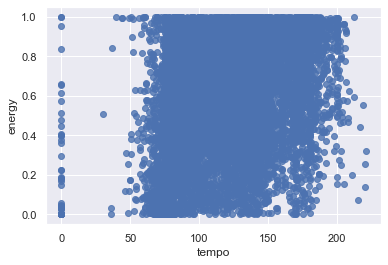

In [129]:
sns.regplot(x='tempo', y='energy', fit_reg=False, data=df)

<Axes: xlabel='valence', ylabel='energy'>

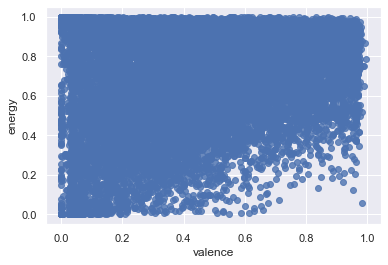

In [130]:
sns.regplot(x='valence', y='energy', fit_reg=False, data=df)

<Axes: xlabel='n_beats', ylabel='energy'>

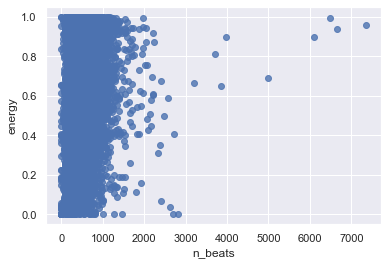

In [131]:
sns.regplot(x='n_beats', y='energy', fit_reg=False, data=df)

<Axes: xlabel='n_bars', ylabel='energy'>

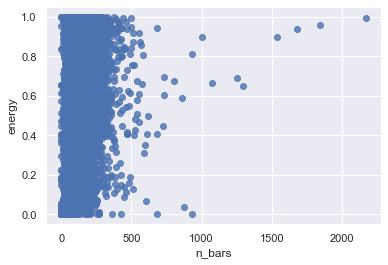

In [132]:
sns.regplot(x='n_bars', y='energy', fit_reg=False, data=df)

<Axes: xlabel='time_signature', ylabel='energy'>

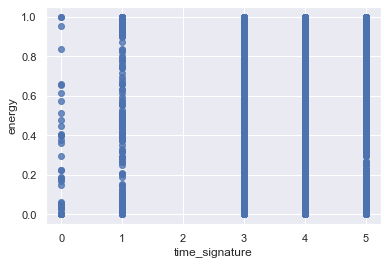

In [133]:
sns.regplot(x='time_signature', y='energy', fit_reg=False, data=df)

<Axes: xlabel='liveness', ylabel='energy'>

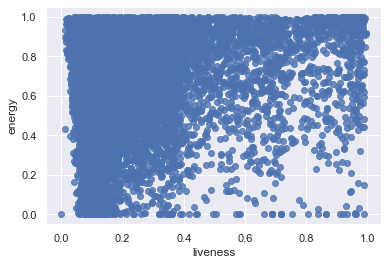

In [134]:
sns.regplot(x='liveness', y='energy', fit_reg=False, data=df)

<Axes: xlabel='duration_ms', ylabel='n_beats'>

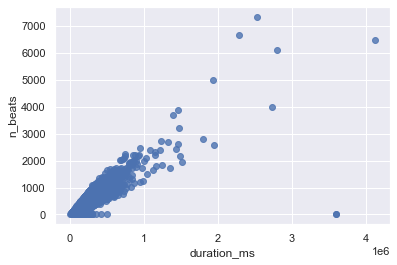

In [135]:
sns.regplot(x='duration_ms', y='n_beats', fit_reg=False, data=df)

<Axes: xlabel='duration_ms', ylabel='n_bars'>

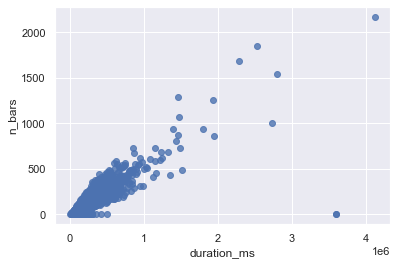

In [136]:
sns.regplot(x='duration_ms', y='n_bars', fit_reg=False, data=df)

## RIMOZIONE OUTLIERS

In [137]:
df_n = df

In [138]:
df_n.isnull().sum()

name                0
duration_ms         0
explicit            0
artists             0
album_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
n_beats             0
n_bars              0
processing          0
genre               0
dtype: int64

In [139]:
df_n

,name,duration_ms,explicit,artists,album_name,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,Long Road,241760,False,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,...,0.302000,0.536000,0.2810,0.6350,142.221,4.0,567.0,141.0,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,...,0.283000,0.934000,0.3600,0.0336,75.596,4.0,617.0,155.0,2.367412,iranian
2,Ondskapens Galakse,333506,False,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,1.0,...,0.000089,0.800000,0.2620,0.4890,116.628,4.0,652.0,162.0,3.700483,black-metal
3,Can't Look Away,269800,False,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,...,0.066400,0.001270,0.1170,0.3850,140.880,4.0,619.0,155.0,1.279305,bluegrass
4,Thunderground,307651,False,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,...,0.000576,0.096900,0.2990,0.6370,143.956,4.0,733.0,183.0,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,Autechre,EP7,0.554,0.657,1,-14.232,1.0,...,0.016000,0.615000,0.1320,0.0335,117.319,4.0,837.0,212.0,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,1.0,...,0.548000,0.940000,0.1230,0.0016,92.323,3.0,277.0,92.0,2.367412,sleep
14997,Psychological Attack,400091,False,Droplex,Psychological Attack,0.799,0.535,1,-9.103,1.0,...,0.001830,0.857000,0.0713,0.0708,126.000,4.0,837.0,209.0,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,1.0,...,0.000337,0.000014,0.4020,0.2700,160.044,4.0,513.0,130.0,1.279305,breakbeat


## duration_ms

<Axes: ylabel='duration_ms'>

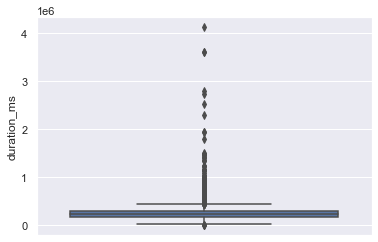

In [140]:
sns.boxplot(y=df["duration_ms"])

In [141]:
df["duration_ms"].mean()

246807.48013333333

In [142]:
df["duration_ms"].median()

227826.0

<Axes: ylabel='duration_ms'>

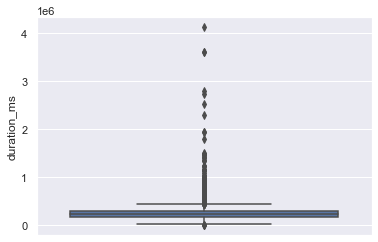

In [143]:
Q1 = df_n['duration_ms'].quantile(0.25, interpolation='linear')
Q3 = df_n['duration_ms'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference=Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR

df_n.loc[(df_n['duration_ms'] > Lowference) & (df_n['duration_ms'] < Upperfence)]
sns.boxplot(y=df_n["duration_ms"])

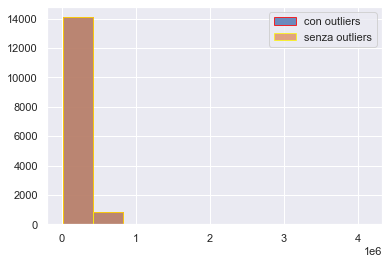

In [144]:
plt.hist(df['duration_ms'], label='con outliers', alpha=.8, edgecolor='red')
plt.hist(df_n['duration_ms'], label='senza outliers', alpha=0.7, edgecolor='yellow')
plt.legend()
plt.show()

<Axes: xlabel='duration_ms', ylabel='energy'>

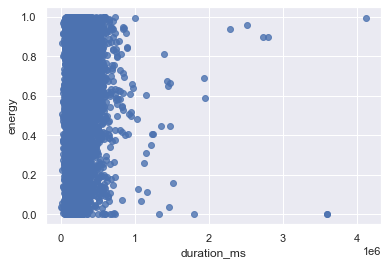

In [145]:
sns.regplot(x='duration_ms', y='energy', fit_reg=False, data=df_n)

## Loudness

<Axes: ylabel='loudness'>

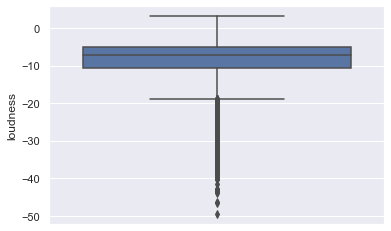

In [146]:
sns.boxplot(y=df["loudness"])

(array([3.000e+00, 1.600e+01, 9.600e+01, 1.810e+02, 3.050e+02, 5.700e+02,
        1.447e+03, 4.751e+03, 7.263e+03, 3.680e+02]),
 array([-49.531 , -44.2623, -38.9936, -33.7249, -28.4562, -23.1875,
        -17.9188, -12.6501,  -7.3814,  -2.1127,   3.156 ]),
 <BarContainer object of 10 artists>)

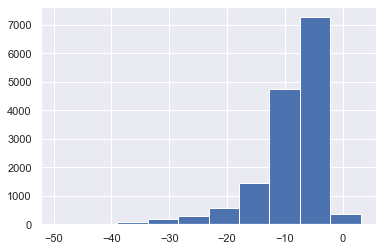

In [147]:
plt.hist(df['loudness'])

In [148]:
df["loudness"].mean()

-8.894999333333335

In [149]:
df["loudness"].median()

-7.303

<Axes: ylabel='loudness'>

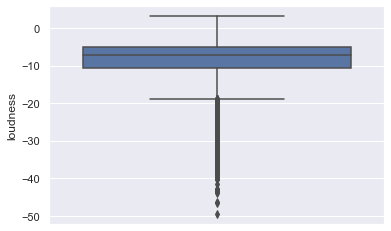

In [150]:
Q1 = df_n['loudness'].quantile(0.25, interpolation='linear')
Q3 = df_n['loudness'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference=Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR

df_n.loc[(df_n['loudness'] > Lowference) & (df_n['loudness'] < Upperfence)]

sns.boxplot(y=df_n["loudness"])

In [151]:
df_n

,name,duration_ms,explicit,artists,album_name,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,Long Road,241760,False,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,...,0.302000,0.536000,0.2810,0.6350,142.221,4.0,567.0,141.0,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,...,0.283000,0.934000,0.3600,0.0336,75.596,4.0,617.0,155.0,2.367412,iranian
2,Ondskapens Galakse,333506,False,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,1.0,...,0.000089,0.800000,0.2620,0.4890,116.628,4.0,652.0,162.0,3.700483,black-metal
3,Can't Look Away,269800,False,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,...,0.066400,0.001270,0.1170,0.3850,140.880,4.0,619.0,155.0,1.279305,bluegrass
4,Thunderground,307651,False,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,...,0.000576,0.096900,0.2990,0.6370,143.956,4.0,733.0,183.0,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,Autechre,EP7,0.554,0.657,1,-14.232,1.0,...,0.016000,0.615000,0.1320,0.0335,117.319,4.0,837.0,212.0,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,1.0,...,0.548000,0.940000,0.1230,0.0016,92.323,3.0,277.0,92.0,2.367412,sleep
14997,Psychological Attack,400091,False,Droplex,Psychological Attack,0.799,0.535,1,-9.103,1.0,...,0.001830,0.857000,0.0713,0.0708,126.000,4.0,837.0,209.0,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,1.0,...,0.000337,0.000014,0.4020,0.2700,160.044,4.0,513.0,130.0,1.279305,breakbeat


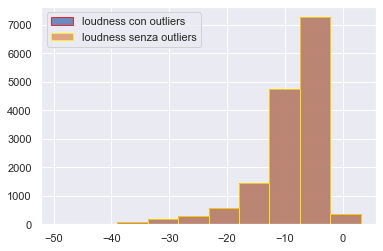

In [152]:
plt.hist(df['loudness'], label='loudness con outliers', alpha=.8, edgecolor='red')
plt.hist(df_n['loudness'], label='loudness senza outliers', alpha=0.7, edgecolor='yellow')
plt.legend()
plt.show()

## 

## Tempo

<Axes: ylabel='tempo'>

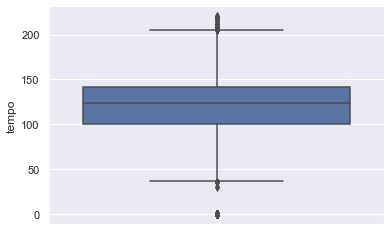

In [153]:
sns.boxplot(y=df["tempo"])

In [154]:
np.std(df['tempo'])

31.929894065692828

In [155]:
df['tempo'].median()

124.188

In [156]:
df['tempo'].mean()  

123.11654359999972

(array([  91.,    5.,  151., 1925., 3018., 4388., 2862., 1854.,  620.,
          86.]),
 array([  0.    ,  22.0525,  44.105 ,  66.1575,  88.21  , 110.2625,
        132.315 , 154.3675, 176.42  , 198.4725, 220.525 ]),
 <BarContainer object of 10 artists>)

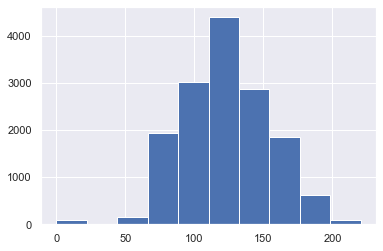

In [157]:
plt.hist(df['tempo'])


## N_beats

<Axes: ylabel='n_beats'>

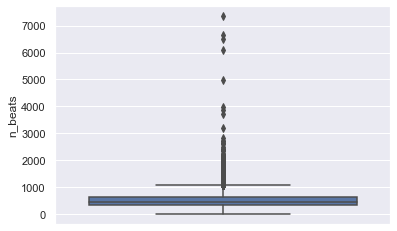

In [158]:
sns.boxplot(y=df["n_beats"])

In [159]:
df['n_beats'].median()

461.0

In [160]:
df['n_beats'].mean()

501.8623333333333

In [161]:
np.std(df['n_beats'])

280.6804475696327

(array([1.2687e+04, 2.2210e+03, 7.1000e+01, 1.2000e+01, 1.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([   0. ,  734.8, 1469.6, 2204.4, 2939.2, 3674. , 4408.8, 5143.6,
        5878.4, 6613.2, 7348. ]),
 <BarContainer object of 10 artists>)

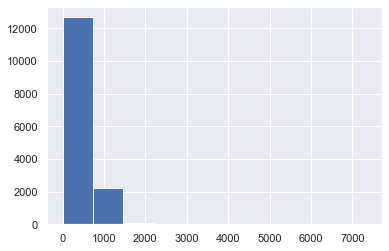

In [162]:
plt.hist(df['n_beats'])


<Axes: ylabel='n_beats'>

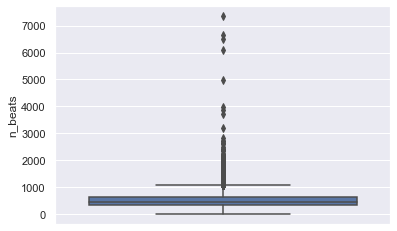

In [163]:
Q1 = df_n['n_beats'].quantile(0.25, interpolation='linear')
Q3 = df_n['n_beats'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference=Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR

df_n.loc[(df_n['n_beats'] > Lowference) & (df_n['n_beats'] < Upperfence)]

sns.boxplot(y=df_n["n_beats"])

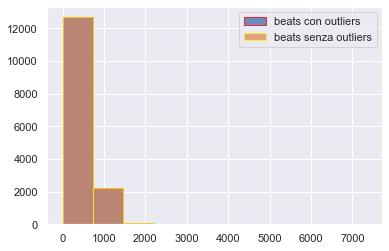

In [164]:
plt.hist(df['n_beats'], label='beats con outliers', alpha=.8, edgecolor='red')
plt.hist(df_n['n_beats'], label='beats senza outliers', alpha=0.7, edgecolor='yellow')
plt.legend()
plt.show()

## n_bars

<Axes: ylabel='n_bars'>

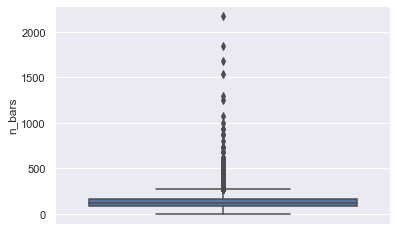

In [165]:
sns.boxplot(y=df["n_bars"])

In [166]:
df['n_bars'].mean()

128.3934

In [167]:
df['n_bars'].median() ## un po' di

117.0

(array([1.3628e+04, 1.3030e+03, 5.0000e+01, 8.0000e+00, 5.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   0.,  217.,  434.,  651.,  868., 1085., 1302., 1519., 1736.,
        1953., 2170.]),
 <BarContainer object of 10 artists>)

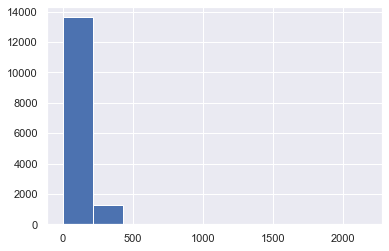

In [168]:
plt.hist(df['n_bars'])

5.294699146302928
91.30564244945214
128.3934
117.0
75.11390978420394
Normalizzo
0.46144629560776607
-0.1881144780133268
121.41802604523646
115.0
54.37054953121843


<Axes: xlabel='n_bars', ylabel='Count'>

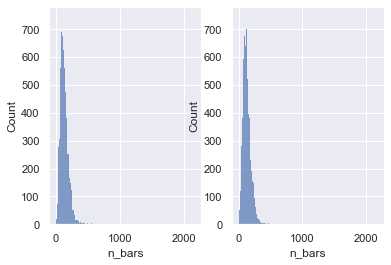

In [169]:
print(df["n_bars"].skew())
print(df["n_bars"].kurt())
print(df["n_bars"].mean())
print(df["n_bars"].median())
print(df["n_bars"].std())
Q1=df_n['n_bars'].quantile(0.25, interpolation='linear')
Q3=df_n['n_bars'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference= Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR
NORMAL = df_n.loc[(df_n['n_bars'] > Lowference)  & (df_n['n_bars'] < Upperfence) ]

print("Normalizzo")
print(NORMAL["n_bars"].skew())
print(NORMAL["n_bars"].kurt())
print(NORMAL["n_bars"].mean())
print(NORMAL["n_bars"].median())
print(NORMAL["n_bars"].std())

plt.subplot(1,2,1)
sns.histplot(data=df["n_bars"])
plt.subplot(1,2,2)
sns.histplot(data=df_n["n_bars"])

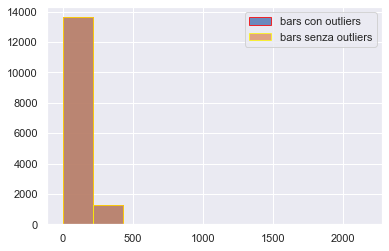

In [170]:
plt.hist(df['n_bars'], label='bars con outliers', alpha=.8, edgecolor='red')
plt.hist(df_n['n_bars'], label='bars senza outliers', alpha=0.7, edgecolor='yellow')
plt.legend()
plt.show()

## Speechiness

<Axes: ylabel='speechiness'>

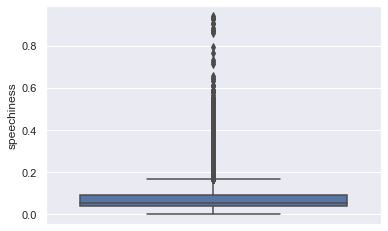

In [171]:
sns.boxplot(y=df["speechiness"])

3.120734514937692
13.46273233446078
0.08377919333333343
0.051
0.08670922080348567
Normalizzo
1.4199926598820827
1.5733114246848556
0.05789121687560987
0.0472
0.031150751817040565


<Axes: xlabel='speechiness', ylabel='Count'>

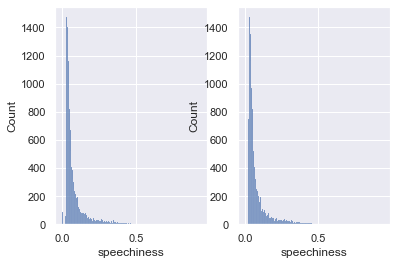

In [172]:
print(df["speechiness"].skew())
print(df["speechiness"].kurt())
print(df["speechiness"].mean())
print(df["speechiness"].median())
print(df["speechiness"].std())
Q1=df_n['speechiness'].quantile(0.25, interpolation='linear')
Q3=df_n['speechiness'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference= Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR
NORMAL = df_n.loc[(df_n['speechiness'] > Lowference)  & (df_n['speechiness'] < Upperfence) ]

print("Normalizzo")
print(NORMAL["speechiness"].skew())
print(NORMAL["speechiness"].kurt())
print(NORMAL["speechiness"].mean())
print(NORMAL["speechiness"].median())
print(NORMAL["speechiness"].std())

plt.subplot(1,2,1)
sns.histplot(data=df["speechiness"])
plt.subplot(1,2,2)
sns.histplot(data=df_n["speechiness"])

## Energy

<Axes: ylabel='energy'>

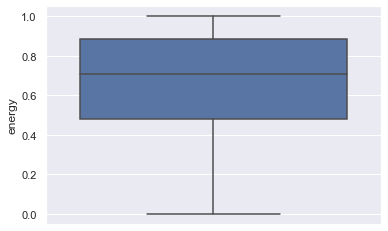

In [173]:
sns.boxplot(y=df["energy"])

<Axes: xlabel='energy', ylabel='Count'>

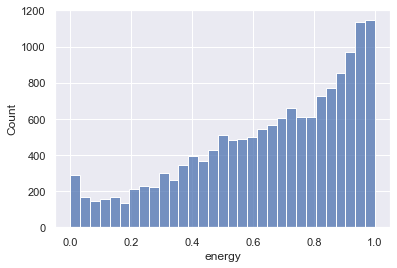

In [174]:
sns.histplot(df["energy"])

## Danceability

<Axes: ylabel='danceability'>

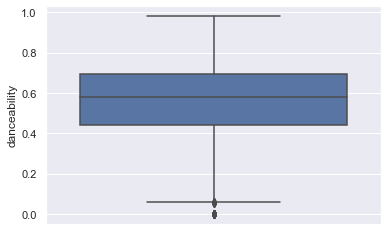

In [175]:
sns.boxplot(y=df["danceability"])

(array([ 280.,  773.,  799., 1049., 1910., 2979., 3133., 2659., 1239.,
         179.]),
 array([0.   , 0.098, 0.196, 0.294, 0.392, 0.49 , 0.588, 0.686, 0.784,
        0.882, 0.98 ]),
 <BarContainer object of 10 artists>)

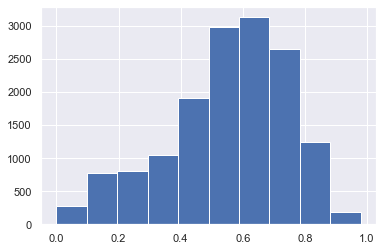

In [176]:
plt.hist(df['danceability'])

-0.6222426526744663
-0.1352700502037516
0.5510634199999984
0.58
0.19423903209879276
Normalizzo
-0.5691841712990896
-0.24976705929457
0.554861399033296
0.581
0.18949713523817113


<Axes: xlabel='danceability', ylabel='Count'>

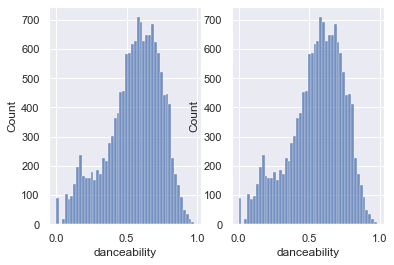

In [177]:
print(df["danceability"].skew())
print(df["danceability"].kurt())
print(df["danceability"].mean())
print(df["danceability"].median())
print(df["danceability"].std())
Q1=df_n['danceability'].quantile(0.25, interpolation='linear')
Q3=df_n['danceability'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference= Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR
NORMAL = df_n.loc[(df_n['danceability'] > Lowference)  & (df_n['danceability'] < Upperfence) ]

print("Normalizzo")
print(NORMAL["danceability"].skew())
print(NORMAL["danceability"].kurt())
print(NORMAL["danceability"].mean())
print(NORMAL["danceability"].median())
print(NORMAL["danceability"].std())


plt.subplot(1,2,1)
sns.histplot(data=df["danceability"])
plt.subplot(1,2,2)
sns.histplot(data=df_n["danceability"])

## Mode

<Axes: ylabel='mode'>

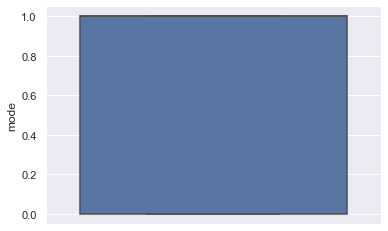

In [178]:
sns.boxplot(y=df["mode"])

(array([ 3889.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11111.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

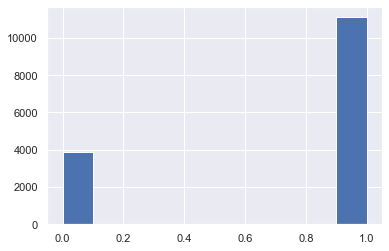

In [179]:
plt.hist(df['mode'])

## key

<Axes: ylabel='key'>

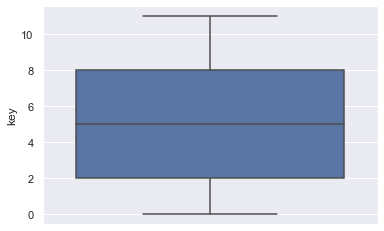

In [180]:
sns.boxplot(y=df["key"])

(array([3309., 1481.,  427., 1081., 1209., 1089., 1800.,  905., 1431.,
        2268.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

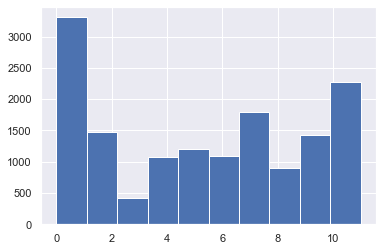

In [181]:
plt.hist(df['key'])

## Acousticness

<Axes: ylabel='acousticness'>

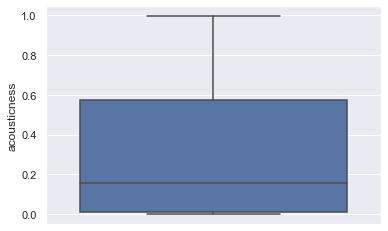

In [182]:
sns.boxplot(y=df["acousticness"])

(array([6612., 1458.,  920.,  866.,  824.,  760.,  801.,  772.,  821.,
        1166.]),
 array([0.    , 0.0996, 0.1992, 0.2988, 0.3984, 0.498 , 0.5976, 0.6972,
        0.7968, 0.8964, 0.996 ]),
 <BarContainer object of 10 artists>)

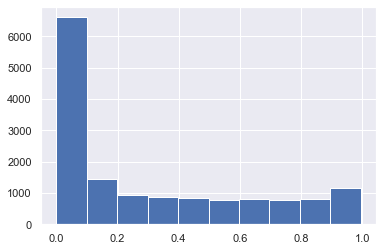

In [183]:
plt.hist(df['acousticness'])

## Instrumentalness

<Axes: ylabel='instrumentalness'>

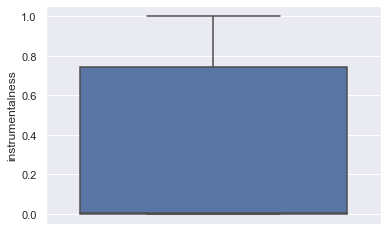

In [184]:
sns.boxplot(y=df["instrumentalness"])

(array([9067.,  397.,  331.,  268.,  229.,  294.,  427.,  673., 1743.,
        1571.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

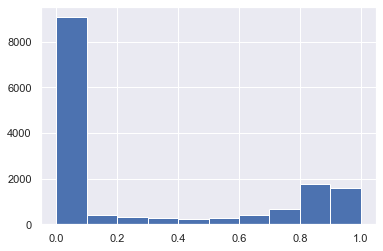

In [185]:
plt.hist(df['instrumentalness'])

## Liveness

<Axes: ylabel='liveness'>

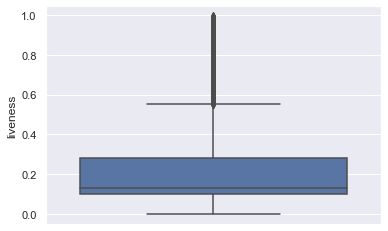

In [186]:
sns.boxplot(y=df["liveness"])

(array([3945., 5835., 1760., 1694.,  446.,  291.,  292.,  232.,  186.,
         319.]),
 array([0.    , 0.0994, 0.1988, 0.2982, 0.3976, 0.497 , 0.5964, 0.6958,
        0.7952, 0.8946, 0.994 ]),
 <BarContainer object of 10 artists>)

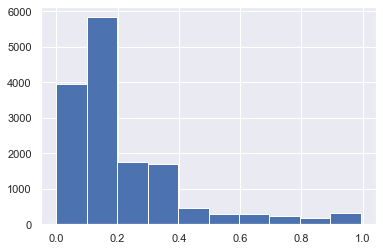

In [187]:
plt.hist(df['liveness'])

In [188]:
df['liveness'].mean()

0.2167901466666682

In [189]:
df['liveness'].median()

0.131

2.0681746794881257
4.138750175631953
0.2167901466666682
0.131
0.1952950515879089
Normalizzo
1.2294112977381715
0.7103266250632481
0.17068545231391313
0.122
0.10961656539633165


<Axes: xlabel='liveness', ylabel='Count'>

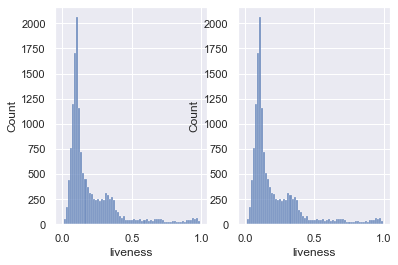

In [190]:
print(df["liveness"].skew())
print(df["liveness"].kurt())
print(df["liveness"].mean())
print(df["liveness"].median())
print(df["liveness"].std())
Q1=df_n['liveness'].quantile(0.25, interpolation='linear')
Q3=df_n['liveness'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference= Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR
NORMAL = df_n.loc[(df_n['liveness'] > Lowference)  & (df_n['liveness'] < Upperfence) ]

print("Normalizzo")
print(NORMAL["liveness"].skew())
print(NORMAL["liveness"].kurt())
print(NORMAL["liveness"].mean())
print(NORMAL["liveness"].median())
print(NORMAL["liveness"].std())


plt.subplot(1,2,1)
sns.histplot(data=df["liveness"])
plt.subplot(1,2,2)
sns.histplot(data=df_n["liveness"])

<Axes: ylabel='liveness'>

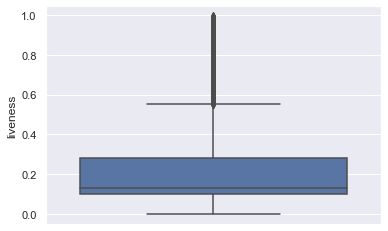

In [191]:
sns.boxplot(y=df_n["liveness"]) ## leva pochi outliers

## Valence

<Axes: ylabel='valence'>

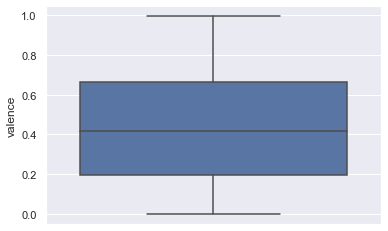

In [192]:
sns.boxplot(y=df["valence"])

(array([2063., 1732., 1682., 1729., 1594., 1457., 1486., 1257., 1110.,
         890.]),
 array([0.    , 0.0995, 0.199 , 0.2985, 0.398 , 0.4975, 0.597 , 0.6965,
        0.796 , 0.8955, 0.995 ]),
 <BarContainer object of 10 artists>)

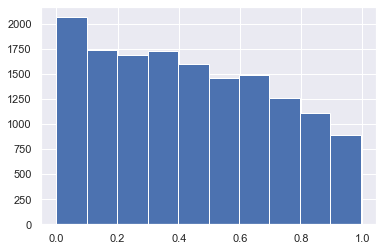

In [193]:
plt.hist(df['valence'])

## Time signature

<Axes: ylabel='time_signature'>

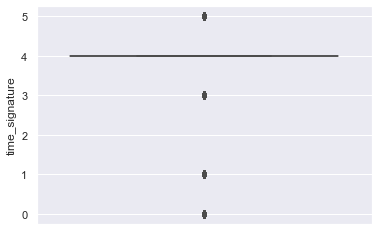

In [194]:
sns.boxplot(y=df["time_signature"])

## Processing

<Axes: ylabel='processing'>

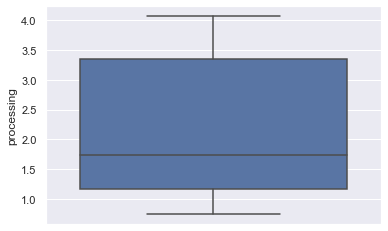

In [195]:
sns.boxplot(y=df["processing"])

In [196]:
len(df_n.columns)

21

In [197]:
df_n.columns

Index(['name', 'duration_ms', 'explicit', 'artists', 'album_name',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'n_beats', 'n_bars', 'processing', 'genre'],
      dtype='object')

In [198]:
len(df.columns)

21

## Fine grafici

In [199]:
#numeric_columns = df_n.select_dtypes(include=['number'])

#for column in numeric_columns.columns:
#    plt.figure(figsize=(8, 6))  # Imposta la dimensione della figura per ogni boxplot
#    sns.boxplot(y=numeric_columns[column], data=df_n)  # Crea un boxplot per la colonna corrente

# questo codice fa solo casino
# il select dtypes limita le colonne a quelle numeriche (sembra) ma questo ha effetto permanentemente quindi poi non funziona più nulla.
# per questo poi dà un sacco di errori e soprattutto la versione finale di df_n è senza le colonne di acoustic etc.
# pertanto, trovare un'altra alternativa.
    

In [200]:
df_n

,name,duration_ms,explicit,artists,album_name,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,Long Road,241760,False,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,...,0.302000,0.536000,0.2810,0.6350,142.221,4.0,567.0,141.0,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,...,0.283000,0.934000,0.3600,0.0336,75.596,4.0,617.0,155.0,2.367412,iranian
2,Ondskapens Galakse,333506,False,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,1.0,...,0.000089,0.800000,0.2620,0.4890,116.628,4.0,652.0,162.0,3.700483,black-metal
3,Can't Look Away,269800,False,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,...,0.066400,0.001270,0.1170,0.3850,140.880,4.0,619.0,155.0,1.279305,bluegrass
4,Thunderground,307651,False,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,...,0.000576,0.096900,0.2990,0.6370,143.956,4.0,733.0,183.0,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,Autechre,EP7,0.554,0.657,1,-14.232,1.0,...,0.016000,0.615000,0.1320,0.0335,117.319,4.0,837.0,212.0,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,1.0,...,0.548000,0.940000,0.1230,0.0016,92.323,3.0,277.0,92.0,2.367412,sleep
14997,Psychological Attack,400091,False,Droplex,Psychological Attack,0.799,0.535,1,-9.103,1.0,...,0.001830,0.857000,0.0713,0.0708,126.000,4.0,837.0,209.0,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,1.0,...,0.000337,0.000014,0.4020,0.2700,160.044,4.0,513.0,130.0,1.279305,breakbeat


In [201]:
df_n.isnull().sum()

name                0
duration_ms         0
explicit            0
artists             0
album_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
n_beats             0
n_bars              0
processing          0
genre               0
dtype: int64

count    15000.000000
mean         0.216790
std          0.195295
min          0.000000
25%          0.097900
50%          0.131000
75%          0.280000
max          0.994000
Name: liveness, dtype: float64

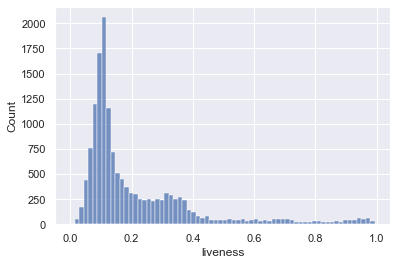

In [205]:
sns.histplot(df_n["liveness"])   #testo la prsenza di outliers
df_n["liveness"].describe()

count    15000.000000
mean       501.862333
std        280.689804
min          0.000000
25%        327.000000
50%        461.000000
75%        625.000000
max       7348.000000
Name: n_beats, dtype: float64

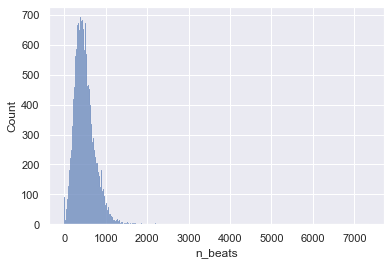

In [207]:
sns.histplot(df_n["n_beats"])   #testo la presenza di outliers
df_n["n_beats"].describe()

<Axes: xlabel='n_beats', ylabel='Count'>

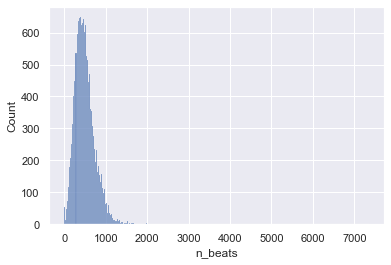